In [2]:
import pandas as pd
data = pd.read_csv("Salary_Data.csv")
data

,YearsExperience,Salary
0,0.3,36.2
1,0.6,36.6
2,0.8,42.8
3,1.1,39.3
4,1.3,46.2
5,1.5,37.7
6,2.0,43.5
7,2.2,39.8
8,2.9,56.6
9,3.0,60.1


In [3]:
X = data['YearsExperience'].to_numpy().reshape((-1,1))
y = data['Salary'].to_numpy()

In [4]:
#建立和訓練模型
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(X, y)
y_pred =model.predict(X)
y_pred

array([ 30.74820017,  33.48532199,  35.31006986,  38.04719168,
        39.87193955,  41.69668743,  46.25855712,  48.08330499,
        54.46992256,  55.3822965 ,  57.20704438,  57.20704438,
        61.76891407,  63.59366194,  64.50603588,  64.50603588,
        65.41840982,  69.06790557,  72.71740132,  74.5421492 ,
        76.36689707,  81.8411407 ,  82.75351464,  90.05250615,
        92.78962796, 100.08861946, 102.82574128, 107.38761097,
       110.12473278, 114.68660247, 115.59897641, 121.98559398,
       123.81034185])

In [5]:
#計算評估指標
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np

r2 = r2_score(y, y_pred) 
mse = mean_squared_error(y, y_pred) #mse 均方誤差
mae = mean_absolute_error(y, y_pred) #mae 平均絕對誤差
rmse = np.sqrt(mse) #rmse 均方根誤差

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.font_manager import fontManager

# 設定中文字型
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

# 設定圖表風格
plt.style.use('ggplot')

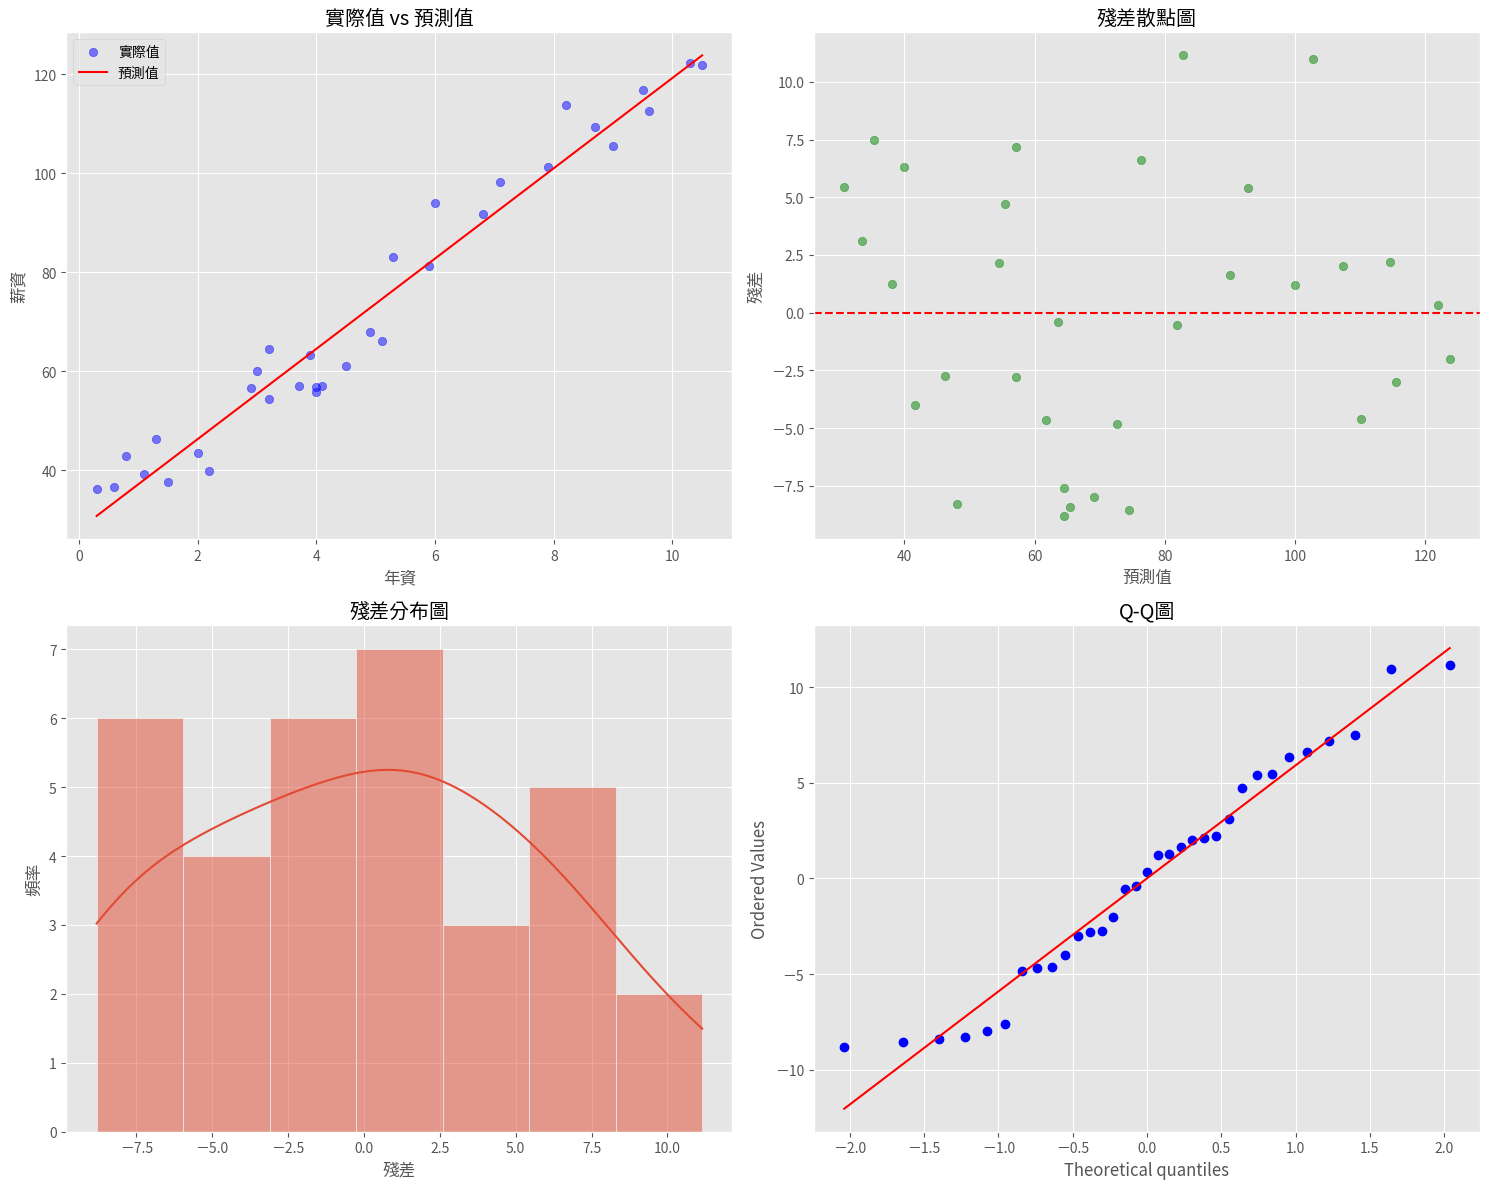

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. 實際值vs預測值散點圖
axes[0, 0].scatter(X, y, color='blue', alpha=0.5, label='實際值')
axes[0, 0].plot(X, y_pred, color="red", label="預測值")
axes[0, 0].set_xlabel('年資')
axes[0, 0].set_ylabel('薪資')
axes[0, 0].set_title('實際值 vs 預測值')
axes[0, 0].legend()

#2. 殘差散點圖
residuals = y - y_pred
axes[0, 1].scatter(y_pred, residuals, color='green', alpha=0.5)
axes[0, 1].axhline(y=0, color='red', linestyle='--')
axes[0, 1].set_xlabel('預測值')
axes[0, 1].set_ylabel('殘差')
axes[0, 1].set_title('殘差散點圖')

#3. 殘差分布圖
sns.histplot(residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('殘差')
axes[1, 0].set_ylabel('頻率')
axes[1, 0].set_title('殘差分布圖')

#4. Q-Q圖
from scipy import stats
stats.probplot(residuals, dist='norm', plot=axes[1,1])
axes[1,1].set_title('Q-Q圖')
plt.tight_layout()
plt.show()

